<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Предпочтения-пользователей-разных-регионов-(NA,-EU,-JP)" data-toc-modified-id="Предпочтения-пользователей-разных-регионов-(NA,-EU,-JP)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Предпочтения пользователей разных регионов (NA, EU, JP)</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

#  Выявление закономерностей, определяющих успешность игры 

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

In [1]:
import pandas as pd
pd.options.display.max_columns = None # отображать все столбцы без разбиения датафрейма на части
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/games.csv', sep=',', decimal='.')

display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Выводы.

- Названия столбцов необходимо привести к нижнему регистру.
- В столбце 'Name' есть два пропуска, что весьма странно: игра не может быть без имени.
- Тип данных в столбце 'Year_of_Release' лучше сменить на 'integer', поскольку дробная часть значений нулевая.
- Столбец 'User_Score' имеет тип 'object'. Скорее всего, это связано с наличием в ряде ячеек аббревиатуры 'tbd'  - 'to be determined'  - "будет определено". Поскольку на данный момент оценка пользователей неопределена, аббревиатуру 'tbd' можно заменить пропуском типа NaN, что позволит сменить тип столца на 'float64' для удобства дальнейших расчётов.
- Значения в столбце 'Rating' — рейтинг от организации ESRB — необходимо расшифровать.

## Предобработка данных

In [3]:
# Названия столбцов необходимо привести к нижнему регистру.
df.columns = df.columns.str.lower()

In [4]:
# Преобразование значений столбца в числовой тип 'Int64'.
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [5]:
# Замена 'tbd' на пропуски
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Преобразование значений столбца в числовой тип 'float64'.
df['user_score'] = df['user_score'].astype('float64')

In [6]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Столбец 'rating' содержит следующие значения.
- NaN - пропущенное значение.
- 'RP' - «Рейтинг ожидается» - продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- 'EC' - «Для детей младшего возраста» - игра подходит для детей от 3 лет.
- 'K-A' - 'Для детей'. В 1998 году рейтинг был переименован в 'Е' - «Для всех» - игра подходит для возрастной категории от 6 лет.
- 'E10+' - «Для всех от 10 лет и старше».
- 'T' - «Подросткам» - игра подходит для лиц от 13 лет.
- 'M' - «Для взрослых» - материалы игры не подходят для подростков младше 17 лет.
- 'AO' - «Только для взрослых» - содержание игры только для взрослых старше 18 лет.
 
Поскольку рейтинг 'K-A' после 1998 г. был переименован в 'E', произведём соответствующую замену в столбце 'rating'. Это неявные дубликаты.

Произведём замену NaN на 'RP', поскольку возрастная группа в обоих случаях не определена.

In [7]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].fillna('RP')


# df['rating'] = df['rating'].replace('EC', 'E')
# df['rating'] = df['rating'].replace('AO', 'M')

In [8]:
df['rating'].value_counts()

RP      6769
E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64

Проверим наличие неявных дубликатов в столбцах 'platform' и 'genre', а также явных дубликатов-строк в таблице.

In [9]:
# Проверим наличие неявных дубликатов в столбцах 'platform' и 'genre'
display(df['platform'].unique())
display(df['genre'].unique())

# Подсчёт явных дубликатов-строк
print('Количество явных дубликатов:', df.duplicated().sum())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Количество явных дубликатов: 0


Дубликаты отсутствуют.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [10]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

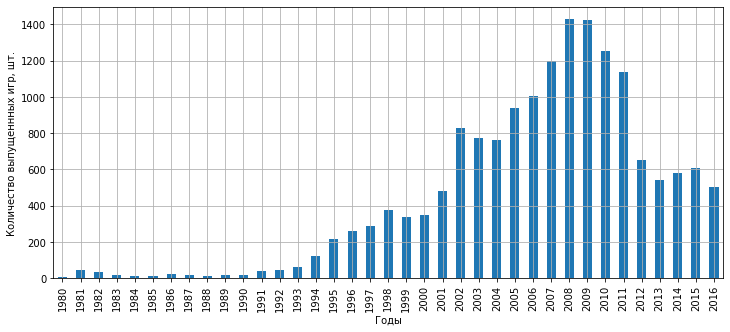

In [11]:
(
    df.groupby('year_of_release')['platform']
    .count()
    .plot(kind='bar', grid=True, figsize=(12, 5))
)

plt.xlabel('Годы')
plt.ylabel('Количество выпущеннных игр, шт.')
plt.show()

In [12]:
# Определим среднее количество игр, выпускавшихся до 1994 г.
(
    df[df['year_of_release'] < 1994]
    .groupby('year_of_release')['platform']
    .count()
    .mean()
    .round()
)

26.0

Заметный рост количества игр начался в 1994 г. До этого в среднем в год выпускали 26 игр. "Отсёчем хвост" слева, далее будем рассматривать период с 1993 по 2016 г.

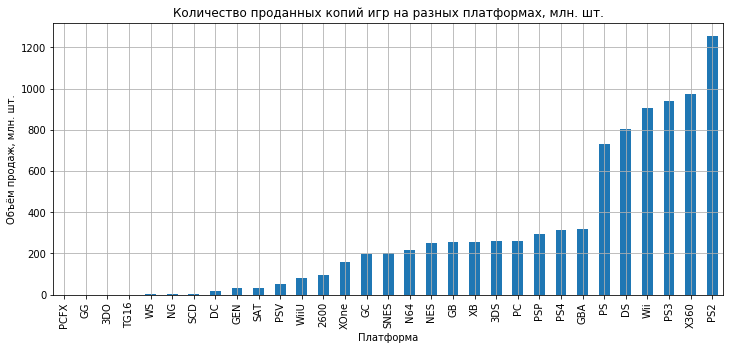

In [13]:
# Определим платформы с наибольшими суммарными продажами
(
  df.groupby('platform')['sum_sales'].sum()
    .sort_values()
    .plot(kind='bar',
          grid=True, 
          figsize=(12, 5),
          title='Количество проданных копий игр на разных платформах, млн. шт.'
         )
)

plt.xlabel('Платформа')
plt.ylabel('Объём продаж, млн. шт.')
plt.show()

Среди игровых платформ выделяются 6: PS2, X360, PS3, Wii, DS, PS. Постром распределение объёмов продаж по годам для каждой из указанных платформ.

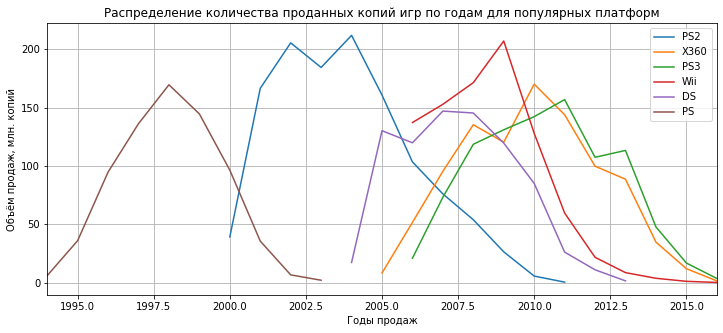

In [14]:
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    (
     df[(df['platform']==platform) & (df['year_of_release']>=1993)]
     .groupby('year_of_release')['sum_sales'].sum()
     .plot(grid=True, figsize=(12, 5), label=platform)        
    )

plt.legend()
plt.xlabel('Годы продаж')
plt.ylabel('Объём продаж, млн. копий')
plt.title('Распределение количества проданных копий игр по годам для популярных платформ')
plt.show()

Судя по графикам, у каждой игровой платформы есть жизненный цикл. Первую половину этого цикла продажи растут, а вторую половину - падают. К 2016 году самые успешные платформы практически полностью потеряли свою актуальность. Определим среднее и медианное значение продолжительности жизненного цикла среди шести популярных платформ.

In [15]:
period = pd.Series()
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    period[platform] = (df[df['platform']==platform]['year_of_release'].max() 
                      - df[df['platform']==platform]['year_of_release'].min())

print(f'Среднее значение продолжительности жизненного цикла среди шести популярных платформ: {period.mean().round()} лет.')
print(f'Медианное значение продолжительности жизненного цикла среди шести популярных платформ: {period.median().round()} лет.')

Среднее значение продолжительности жизненного цикла среди шести популярных платформ: 13.0 лет.
Медианное значение продолжительности жизненного цикла среди шести популярных платформ: 10.0 лет.


Для прогноза продаж на 2017 год имеет смысл рассмотреть период с 2011 по 2016 г. Платформы, используемые на данном временном отрезке, могут оказать какое-то влияние на продажи в 2017 г.

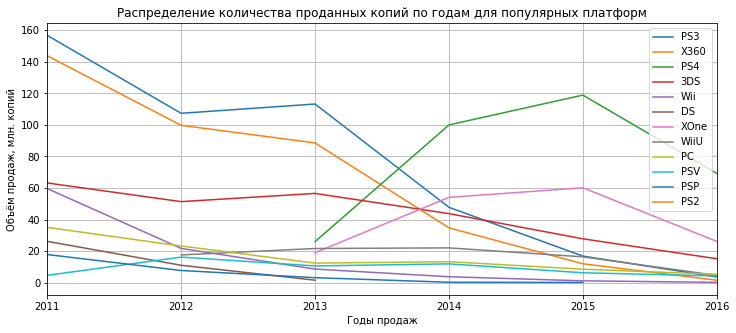

In [16]:
df_filtered = df[(df['year_of_release'] >= 2011)]

for platform in df_filtered['platform'].unique():
    (
     df_filtered[df_filtered['platform']==platform]
     .groupby('year_of_release')['sum_sales'].sum()
     .plot(grid=True, figsize=(12, 5), label=platform)        
    )

plt.legend()
plt.xlabel('Годы продаж')
plt.ylabel('Объём продаж, млн. копий')
plt.title('Распределение количества проданных копий по годам для популярных платформ')
plt.show()

Можно выделить три потенциально прибыльные платформы: 3DS, XOne и PS4. Они лидируют по количеству проданных копий игр в 2015 и 2016 гг. Скорее всего, платформы XOne и PS4 находятся в фазе роста, поскольку появились в 2013 г. Падение продаж в 2016 г. можно объяснить неполными данными за этот год.

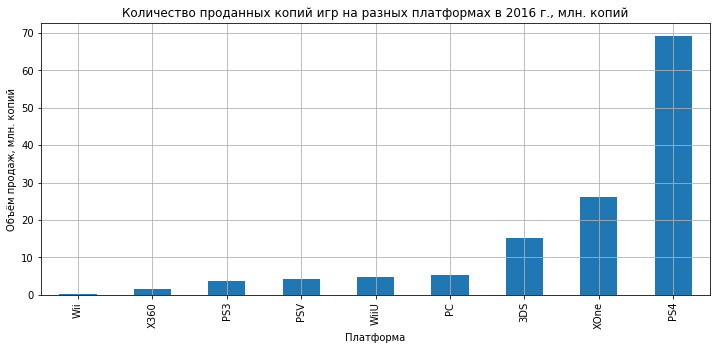

In [17]:
# Определим платформы с наибольшими суммарными продажами в 2016 г.
(
  df.loc[df['year_of_release'] >= 2016]
    .groupby('platform')['sum_sales'].sum()
    .sort_values()
    .plot(kind='bar',
          grid=True, 
          figsize=(12, 5),
          title='Количество проданных копий игр на разных платформах в 2016 г., млн. копий'
         )
)

plt.xlabel('Платформа')
plt.ylabel('Объём продаж, млн. копий')
plt.show()

Построим диаграммы размаха объёмов продаж игр для всех игровых платформ за период с 2011 по 2016 г.

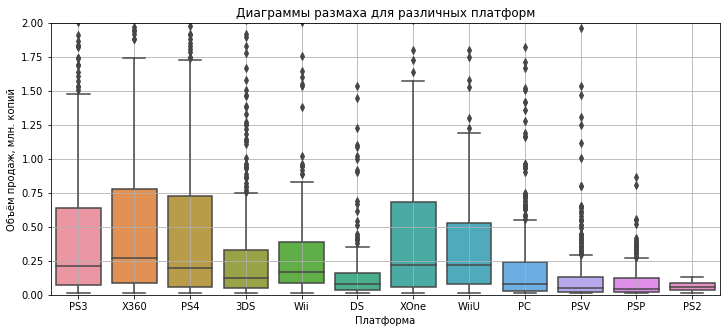

In [18]:
plt.figure(figsize=(12,5))

sns.boxplot(x='platform', y='sum_sales', data=df_filtered)

plt.title('Диаграммы размаха для различных платформ')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж, млн. копий')
plt.grid()
plt.ylim(0,2)
plt.show()

- Наибольший межквартильный размах имеют следующие платформы: PS3, X360, PS4, XOne, WiiU. Медианное значение объёма продаж игр на этих платформах находится на уровне 0,25 млн. копий.
- В большинстве случаев каждая четверть выборки шире предыдущей. В четвертой четверти каждой выборки большое количество выбросов. Всё это говорит о большем разбросе объёмов продаж, превышающих медианное значение. Гистограммы выборок будут иметь правостороннюю ассиметрию.

Посмотрим, как влияют на продажи игр отзывы пользователей и критиков. Возьмём две популярные платформы: 3DS и PS4. Первая находится в фазе роста объёмов продаж, вторая - в фазе падения. Для каждой платформы построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

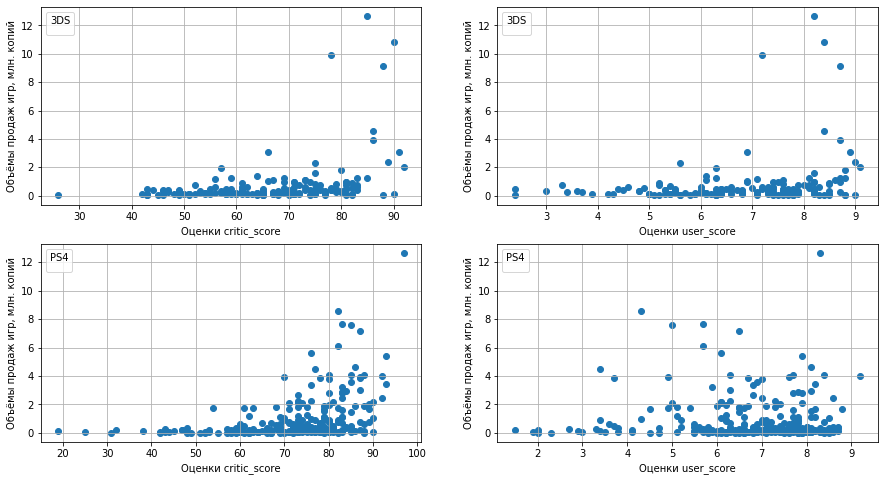

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

i=0
for platform in ['3DS', 'PS4']:
    j = 0
    for score in ['critic_score', 'user_score']:
        ax[i, j].scatter(
                         x = df_filtered[df_filtered['platform']==platform][score], 
                         y = df_filtered[df_filtered['platform']==platform]['sum_sales'],
                        )
        ax[i, j].legend('', loc="upper left", title=platform)
        ax[i, j].set_xlabel(f'Оценки {score}')
        ax[i, j].set_ylabel('Объёмы продаж игр, млн. копий')
#        ax[i, j].set_title(platform)
        ax[i, j].grid()
        j += 1
    i+=1

# plt.show()

Оценим корреляцию между отзывами ('critic_score', 'user_score') и продажами игр ('sum_sales') с помощью коэффициента корреляции Пирсона.

In [20]:
corr_сoeff = pd.DataFrame()

for platform in df_filtered['platform'].unique():
    corr_сoeff[platform] = (
                         df_filtered.loc[df_filtered['platform']==platform, ['critic_score', 'user_score']]
                                    .corrwith(df_filtered['sum_sales'], axis=0, method='pearson')
                                    .round(2)
                           )

corr_сoeff

,PS3,X360,PS4,3DS,Wii,DS,XOne,WiiU,PC,PSV,PSP,PS2
critic_score,0.38,0.39,0.41,0.35,0.29,0.26,0.42,0.35,0.31,0.13,0.36,NaN
user_score,0.01,0.04,-0.03,0.22,0.15,0.28,-0.07,0.40,-0.05,0.01,0.01,-0.49


Полученные результаты для PS2 во внимание принимать не будем из-за малого количества оценок. Судя по диаграммам рассеяния и коэффициентам корреляции, для большинства платформ объёмы продаж игр никак не связаны с оценками пользователей. Связь объёмов продаж с оценками критиков есть, но слабая.

Посмотрим общее распределение игр и объёмов продаж по жанрам.

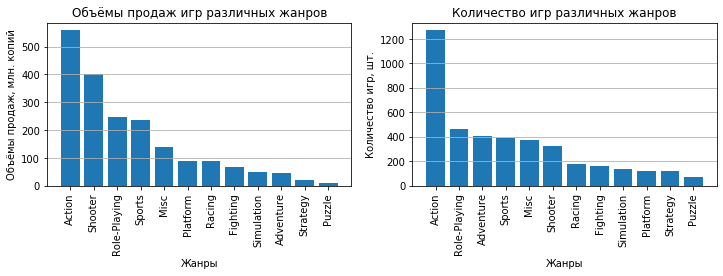

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Объёмы продаж игр различных жанров
ax[0].bar(
                 x      = (df_filtered.groupby('genre')['sum_sales'].sum()
                                      .sort_values(ascending=False)
                                      .index), 
                 height = (df_filtered.groupby('genre')['sum_sales'].sum()
                                      .sort_values(ascending=False)
                                      .values)
          )

ax[0].set_xlabel('Жанры')
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].set_ylabel('Объёмы продаж, млн. копий')
ax[0].set_title('Объёмы продаж игр различных жанров')
ax[0].grid(axis='y')

# Количество игр различных жанров
ax[1].bar(
          x      = df_filtered['genre'].value_counts().index, 
          height = df_filtered['genre'].value_counts().values
         )

ax[1].set_xlabel('Жанры')
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].set_ylabel('Количество игр, шт.')
ax[1].set_title('Количество игр различных жанров')
ax[1].grid(axis='y')

# plt.show()

- Игры жанра 'Action' имеют самый большой суммарный объём продаж (см. выше график 1), который достигается за счёт их большого количества (см. выше график 2).
- Большой суммарный объём продаж игр жанра 'Shooter' (см. выше график 1) обеспечен относительно небольшим их количеством (см. выше график 2). Скорее всего, игры этого жанра имеют наибольший средний объём продаж, т.е. в среднем продаются лучше остальных. Проверим это далее. 

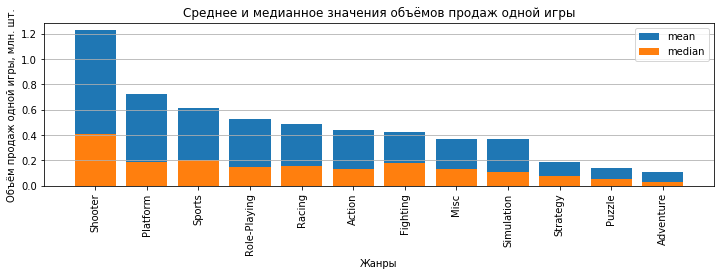

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

# Количество игр различных жанров
ax.bar(
                 x      = (df_filtered.groupby('genre')['sum_sales'].mean()
                                      .sort_values(ascending=False)
                                      .index), 
                 height = (df_filtered.groupby('genre')['sum_sales'].mean()
                                      .sort_values(ascending=False)
                                      .values),
                 label='mean'
      )

ax.bar(
                 x      = (df_filtered.groupby('genre')['sum_sales'].median()
                                      .sort_values(ascending=False)
                                      .index), 
                 height = (df_filtered.groupby('genre')['sum_sales'].median()
                                      .sort_values(ascending=False)
                                      .values),
                label='median' 
       )

ax.legend()
ax.set_xlabel('Жанры')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Объём продаж одной игры, млн. шт.')
ax.set_title('Среднее и медианное значения объёмов продаж одной игры')
ax.grid(axis='y')

- Гипотеза о том, что игры жанра Shooter имеют наибольший средний объём продаж, подтвердилась.
- В каждом жанре есть игры-хиты с большими объёмами продаж, которые вызывают смещение среднего значения относительно медианы в большую сторону.


## Предпочтения пользователей разных регионов (NA, EU, JP)

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [23]:
top_5_platforms = pd.DataFrame()

for sales in ['jp_sales', 'eu_sales', 'na_sales']:
    top_5_platforms = (
                       df_filtered.groupby('platform')[sales].sum()
                                  .sort_values(ascending=False)
                                  .reset_index()
                                  .loc[:4]
                                  .rename(columns={'platform': f'{sales[:2]}_top'})
                                  .join(top_5_platforms)
                       )


top_5_platforms

,na_top,na_sales,eu_top,eu_sales,jp_top,jp_sales
0,X360,226.80,PS3,163.10,3DS,100.62
1,PS3,168.26,PS4,141.09,PS3,49.39
2,PS4,108.74,X360,117.10,PSP,24.04
3,XOne,93.12,3DS,61.27,PSV,21.84
4,3DS,82.65,PC,56.70,PS4,15.96


In [24]:
top_5_genres = pd.DataFrame()

for sales in ['jp_sales', 'eu_sales', 'na_sales']:
    top_5_genres = (
                       df_filtered.groupby('genre')[sales].sum()
                                  .sort_values(ascending=False)
                                  .reset_index()
                                  .loc[:4]
                                  .rename(columns={'genre': f'{sales[:2]}_top'})
                                  .join(top_5_genres)
                       )


top_5_genres

,na_top,na_sales,eu_top,eu_sales,jp_top,jp_sales
0,Action,230.92,Action,199.12,Role-Playing,79.87
1,Shooter,194.43,Shooter,148.02,Action,63.62
2,Sports,108.70,Sports,88.48,Misc,17.60
3,Role-Playing,83.78,Role-Playing,62.30,Fighting,12.38
4,Misc,69.69,Racing,40.58,Platform,12.13


Самыми популярными платформами в `Японии` оказались платформы `японских` фирм Sony и Nintendo, что вполне логично. В Северной `Америке` в топ-5 вошли Xbox 360 и Xbox One `американской` фирмы Microsoft, что тоже вполне логично. Европейские потребители предпочитают японские платформы: из американских в топ-5 оказалась только Xbox 360.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

Предпочтения западных потребителей, европейских и американских, почти совпали: первые четыре позиции в топ-5 одни и те же. Предпочтения японцев иные, что связано с иным менталитетом, не похожим на западный.

Определим для пользователя каждого региона (NA, EU, JP), влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [25]:
top_5_ESRB = pd.DataFrame()

for sales in ['jp_sales', 'eu_sales', 'na_sales']:
    top_5_ESRB = (
                   df_filtered.groupby('rating')[sales].sum()
                              .sort_values(ascending=False)
                              .reset_index()
                              .loc[:4]
                              .rename(columns={'rating': f'{sales[:2]}_top'})
                              .join(top_5_ESRB)
                  )

top_5_ESRB

,na_top,na_sales,eu_top,eu_sales,jp_top,jp_sales
0,M,308.45,M,250.26,RP,138.21
1,E,170.17,E,141.73,E,36.68
2,RP,123.69,RP,116.64,T,33.39
3,E10+,117.72,T,83.16,M,26.14
4,T,109.31,E10+,78.00,E10+,11.23


В топ-5 вошли одни и те же категории ESRB, независимо от региона. Западные потребители предпочитают игры «для взрослых» (M): неслучайно их любымыми жанрами оказались 'Action' и 'Shooter'. Японцы не такие кровожадные, однако следует оговориться, что для бóльшей части игр в Японии возрастной рейтинг не определён.

## Проверка статистических гипотез

- Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC разные.

In [26]:
# Пользовательские рейтинги платформ

user_score_xone = df_filtered[(df_filtered['platform'] == 'XOne') &
                              ~df_filtered['user_score'].isna()]['user_score']

user_score_pc = df_filtered[(df_filtered['platform'] == 'PC') &
                              ~df_filtered['user_score'].isna()]['user_score']
                  
print('Средний пользовательский рейтинг платформы Xbox One:', user_score_xone.mean().round(2))
print('Средний пользовательский рейтинг платформы PC:', user_score_pc.mean().round(2))

# Проверим гипотезу о равенстве средних двух генеральных совокупностей

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)

print(f'''
Полученное значение p-value = {results.pvalue.round(2)}. Вероятность получить случайно текущую или бóльшую разницу 
в значениях среднего рейтинга платформ Xbox One и PC приблизительно равна {results.pvalue:.0%}.
       ''')

if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу.')

else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу.')

Средний пользовательский рейтинг платформы Xbox One: 6.52
Средний пользовательский рейтинг платформы PC: 6.45

Полученное значение p-value = 0.61. Вероятность получить случайно текущую или бóльшую разницу 
в значениях среднего рейтинга платформ Xbox One и PC приблизительно равна 61%.
       
Вывод: не получилось отвергнуть нулевую гипотезу.


- Нулевая гипотеза: cредние пользовательские рейтинги жанров 'Action' и 'Sports' одинаковые.
- Альтернативная гипотеза: cредние пользовательские рейтинги жанров 'Action' и 'Sports' разные.

In [27]:
# Пользовательские рейтинги жанров 'Action' и 'Sports'

user_score_action = df_filtered[(df_filtered['genre'] == 'Action') &
                              ~df_filtered['user_score'].isna()]['user_score']

user_score_sports = df_filtered[(df_filtered['genre'] == 'Sports') &
                              ~df_filtered['user_score'].isna()]['user_score']
                  
print('Средний пользовательский рейтинг жанра "Action":', user_score_action.mean().round(2))
print('Средний пользовательский рейтинг платформы "Sports":', user_score_sports.mean().round(2))

# Проверим гипотезу о равенстве средних двух генеральных совокупностей

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print(f'''
Полученное значение p-value = {results.pvalue}. Вероятность получить случайно текущую или 
бóльшую разницу в значениях среднего рейтинга жанров 'Action' и 'Sports' приблизительно равна {results.pvalue:.0%}.
       ''')

if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу.')

else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу.')

Средний пользовательский рейтинг жанра "Action": 6.78
Средний пользовательский рейтинг платформы "Sports": 5.65

Полученное значение p-value = 8.285648549432565e-19. Вероятность получить случайно текущую или 
бóльшую разницу в значениях среднего рейтинга жанров 'Action' и 'Sports' приблизительно равна 0%.
       
Вывод: отвергаем нулевую гипотезу.


## Выводы

- Наболее перспективными игровыми платформами являются 3DS, Xbox One и PS4. При этом плавтформы Xbox One и PS4 находятся в фазе роста.
- Общий объём продаж наибольший у игр жанра 'Action', однако он достигается за счёт большого количества игр указанного жанра. Средний объём продаж наибольший у игр жанра 'Shooter'.
- Если рассматривать распределение объёмов продаж игр внутри платформы или жанра, то везде наблюдается правосторонняя ассиметрия и смещение среднего значения относительно медианы в большую сторону. Причиной этого является наличие игр-хитов, которые создают "выбросы" в распределнии объёмов продаж.
- Предпочтения жителей Запада во многом совпадают и отличаются от предпочтений жителей Японии.
- Объёмы продаж игр не связаны с оценками пользователей и слабо коррелируют с оценками критиков.
- Нет оснований отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Нет оснований отвергнуть гипотезу о том, что пользовательские рейтинги жанров 'Action'  и 'Sports' разные.